    head_size  fetus  observer
31       12.7    3.0       3.0
32       12.5    3.0       3.0
33       13.0    3.0       4.0
34       12.9    3.0       4.0
35       13.8    3.0       4.0


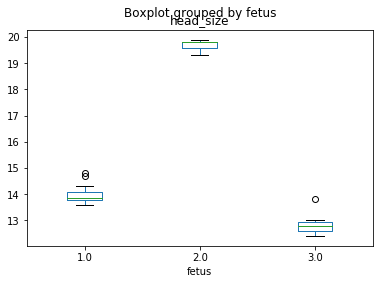

In [10]:
# 이원분산분석(two-way ANOVA)  ---------------------------
# 독립변인의 수가 두 개 이상일 때 집단 간 차이가 유의한지를 검증하는 데 사용한다.
# 상호작용효과(Interaction effect), 한 변수의 변화가 결과에 미치는 영향이 다른 변수의 수준에 따라 달라지는지를 확인하기 위해 사용된다.
# 예제 데이터(altman_12_6) 설명
# 태아의 머리 둘레 측정 데이터다. 4명의 관측자가 3명의 태아를 대상으로 측정함.
# 이를 통해서 초음파로 태아의 머리 둘레측정 데이터가 재현성이 있는지를 조사함.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import urllib  # url로 데이터 얻어오기

url_base = 'https://raw.githubusercontent.com/thomas-haslwanter/statsintro_python/master/ipynb/Data/data_altman/'
url = url_base + 'altman_12_6.txt'
data = np.genfromtxt(urllib.request.urlopen(url), delimiter=',')

# Bring them in dataframe-format
df = pd.DataFrame(data, columns=['head_size', 'fetus', 'observer'])
print(df.tail())

#     head_size  fetus  observer
# 31       12.7    3.0       3.0
# 32       12.5    3.0       3.0
# 33       13.0    3.0       4.0
# 34       12.9    3.0       4.0
# 35       13.8    3.0       4.0

# 태아별 머리 둘레 plot 만들기
df.boxplot(column = 'head_size', by='fetus' , grid = False)
plt.show()

In [12]:
import scipy.stats as stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
#import warnings  # 경고 메세지 무시하기
#warnings.filterwarnings('ignore')


# 태아(fetus) 3명의 머리둘레는 차이가 있어 보이나 이것이 관측자와 상호작용이 있는 것인지 분석을 통해 알아 보겠다.
# 분산분석으로 상관관계 확인: statmodels 라이브러리를 사용해 계산

formula = 'head_size ~ C(fetus) + C(observer) + C(fetus):C(observer)'
lm = smf.ols(formula, df).fit()  # 선형회귀를 이용
print(sm.stats.anova_lm(lm))

#                         df      sum_sq     mean_sq            F        PR(>F)
# C(fetus)               2.0  324.008889  162.004444  2113.101449  1.051039e-27
# C(observer)            3.0    1.198611    0.399537     5.211353   6.497055e-03
# C(fetus):C(observer)   6.0    0.562222    0.093704     1.222222  3.295509e-01
# Residual              24.0    1.840000    0.076667          NaN           NaN

# p-value 가 0.05 보다 작다. 따라서 귀무가설을 기각할 수 없고,
# 측정자와 태아의 머리 둘레값에는 연관성이 없다고 할 수 있다. 측정하는 사람이 달라도 머리 둘레값은 일정하다는 얘기.

# 해설 : 초음파로 측정하는 태아의 머리 둘레값은 믿을 수 있다고 판단할 수 있다.
# 분산분석(ANOVA)은 전체 그룹간의 평균값 차이가 통계적 의미가 있는지 판단하는데 유용한 도구다.
# 하지만 정확히 어느 그룹의 평균값이 의미가 있는지는 알려주지는 않는다.
# 그러므로 그룹 간의 관계를 보기 위해 추가적인 사후분석(Post Hoc Analysis)이 필요하다.

                        df      sum_sq     mean_sq            F        PR(>F)
C(fetus)               2.0  324.008889  162.004444  2113.101449  1.051039e-27
C(observer)            3.0    1.198611    0.399537     5.211353  6.497055e-03
C(fetus):C(observer)   6.0    0.562222    0.093704     1.222222  3.295509e-01
Residual              24.0    1.840000    0.076667          NaN           NaN
